In [1]:
ls

 Volume in drive C is Windows
 Volume Serial Number is E6A6-270F

 Directory of C:\Users\Koert\Documents\KNMI_Internship_GANs\working_with_radar_data

09/02/2021  14:13    <DIR>          .
09/02/2021  14:13    <DIR>          ..
09/02/2021  14:13    <DIR>          .ipynb_checkpoints
09/02/2021  14:05             2.516 data_exploration.ipynb
09/02/2021  13:47    <DIR>          RAD25_OPER_R___TARRRT__L2__20181219080000_20181220075500_0001
09/02/2021  13:46         8.642.560 RAD25_OPER_R___TARRRT__L2__20181219080000_20181220075500_0001.tar
               2 File(s)      8.645.076 bytes
               4 Dir(s)  301.089.976.320 bytes free


In [59]:
from os import listdir
from os.path import isfile, join
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [98]:
radar_dir = './RAD25_OPER_R___TARRRT__L2__20181219080000_20181220075500_0001/'

onlyfiles = [f for f in listdir(radar_dir) if isfile(join(radar_dir, f))]

In [106]:
def print_it(name):
    dset = f[name]
    print(dset)
    print(type(dset))
    print()


with h5py.File(radar_dir+onlyfiles[0], 'r')  as f:
    f.visit(print_it)

<HDF5 group "/geographic" (1 members)>
<class 'h5py._hl.group.Group'>

<HDF5 group "/geographic/map_projection" (0 members)>
<class 'h5py._hl.group.Group'>

<HDF5 group "/image1" (3 members)>
<class 'h5py._hl.group.Group'>

<HDF5 group "/image1/calibration" (0 members)>
<class 'h5py._hl.group.Group'>

<HDF5 dataset "image_data": shape (765, 700), type "<u2">
<class 'h5py._hl.dataset.Dataset'>

<HDF5 group "/image1/statistics" (0 members)>
<class 'h5py._hl.group.Group'>

<HDF5 group "/image2" (3 members)>
<class 'h5py._hl.group.Group'>

<HDF5 group "/image2/calibration" (0 members)>
<class 'h5py._hl.group.Group'>

<HDF5 dataset "image_data": shape (765, 700), type "<u2">
<class 'h5py._hl.dataset.Dataset'>

<HDF5 group "/image2/statistics" (0 members)>
<class 'h5py._hl.group.Group'>

<HDF5 group "/overview" (0 members)>
<class 'h5py._hl.group.Group'>

<HDF5 group "/radar1" (0 members)>
<class 'h5py._hl.group.Group'>

<HDF5 group "/radar2" (0 members)>
<class 'h5py._hl.group.Group'>

<HDF

In [94]:
h5f = h5py.File(radar_dir+onlyfiles[0], 'r')

<HDF5 group "/image1" (3 members)>

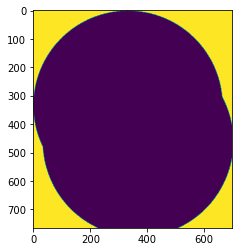

In [104]:
img = np.array(h5f['image1']['image_data'])
plt.imshow(img)

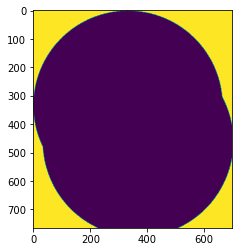

In [105]:
img = np.array(h5f['image2']['image_data'])
plt.imshow(img)

In [107]:
# https://stackoverflow.com/questions/51548551/reading-nested-h5-group-into-numpy-array
def traverse_datasets(hdf_file):

    def h5py_dataset_iterator(g, prefix=''):
        for key in g.keys():
            item = g[key]
            path = f'{prefix}/{key}'
            if isinstance(item, h5py.Dataset): # test for dataset
                yield (path, item)
            elif isinstance(item, h5py.Group): # test for group (go down)
                yield from h5py_dataset_iterator(item, path)

    for path, _ in h5py_dataset_iterator(hdf_file):
        yield path


In [108]:
with h5py.File(radar_dir+onlyfiles[0], 'r') as f:
    for dset in traverse_datasets(f):
        print('Path:', dset)
        print('Shape:', f[dset].shape)
        print('Data type:', f[dset].dtype)

Path: /image1/image_data
Shape: (765, 700)
Data type: uint16
Path: /image2/image_data
Shape: (765, 700)
Data type: uint16
